In [3]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv("result/term_document_matrix.csv")

In [6]:
df = df.rename(columns={'Unnamed: 0' : 'Token'})


In [7]:
df = df.set_index('Token')

In [8]:
X = df.values.T

In [9]:
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
Y = tsne.fit_transform(X)

In [10]:
tsne.kl_divergence_

0.01887115277349949

In [11]:
title = df.columns.to_list()
label = list(map(lambda x : " ".join(x.split()[:2]), title))
label

['Aloe',
 'Mwape Miti',
 'Active Server',
 'Antidepressant',
 'Argon',
 'Antarctic Circumpolar',
 'Saviour Kasukuwere',
 'Hudhayfah ibn',
 'Christmas Island',
 'Andrew Martinez',
 'Bromeliales',
 'Alexander of',
 'Funny Business',
 'County Fermanagh',
 'Trust (1990',
 'Malaysia Federal',
 'Carnivora',
 'Plate appearance',
 'Charro (Mexican',
 'Alan Ayckbourn',
 'Casey at',
 'Hakkasan',
 'National Organization',
 'Simmerath',
 'Arbeit macht',
 'Billy Roberts',
 'Chris Thorburn',
 'Nula Conwell',
 'California',
 'Cigarette tax',
 'Affidavit',
 'Little Niangua',
 'Politics of',
 'Consciousness',
 'Pies Descalzos,',
 'Analysis',
 'Zhang Sixun',
 'Bombardier Inc.',
 'Theosophical Society',
 'Merzenich',
 'Amputation',
 'Başmakçı',
 'Richilde, Countess',
 'Battle of',
 'Castelloza',
 'Antioxidant',
 'Hassa, Hatay',
 'Breast reconstruction',
 'Susan Williams-Ellis',
 'Aquila']

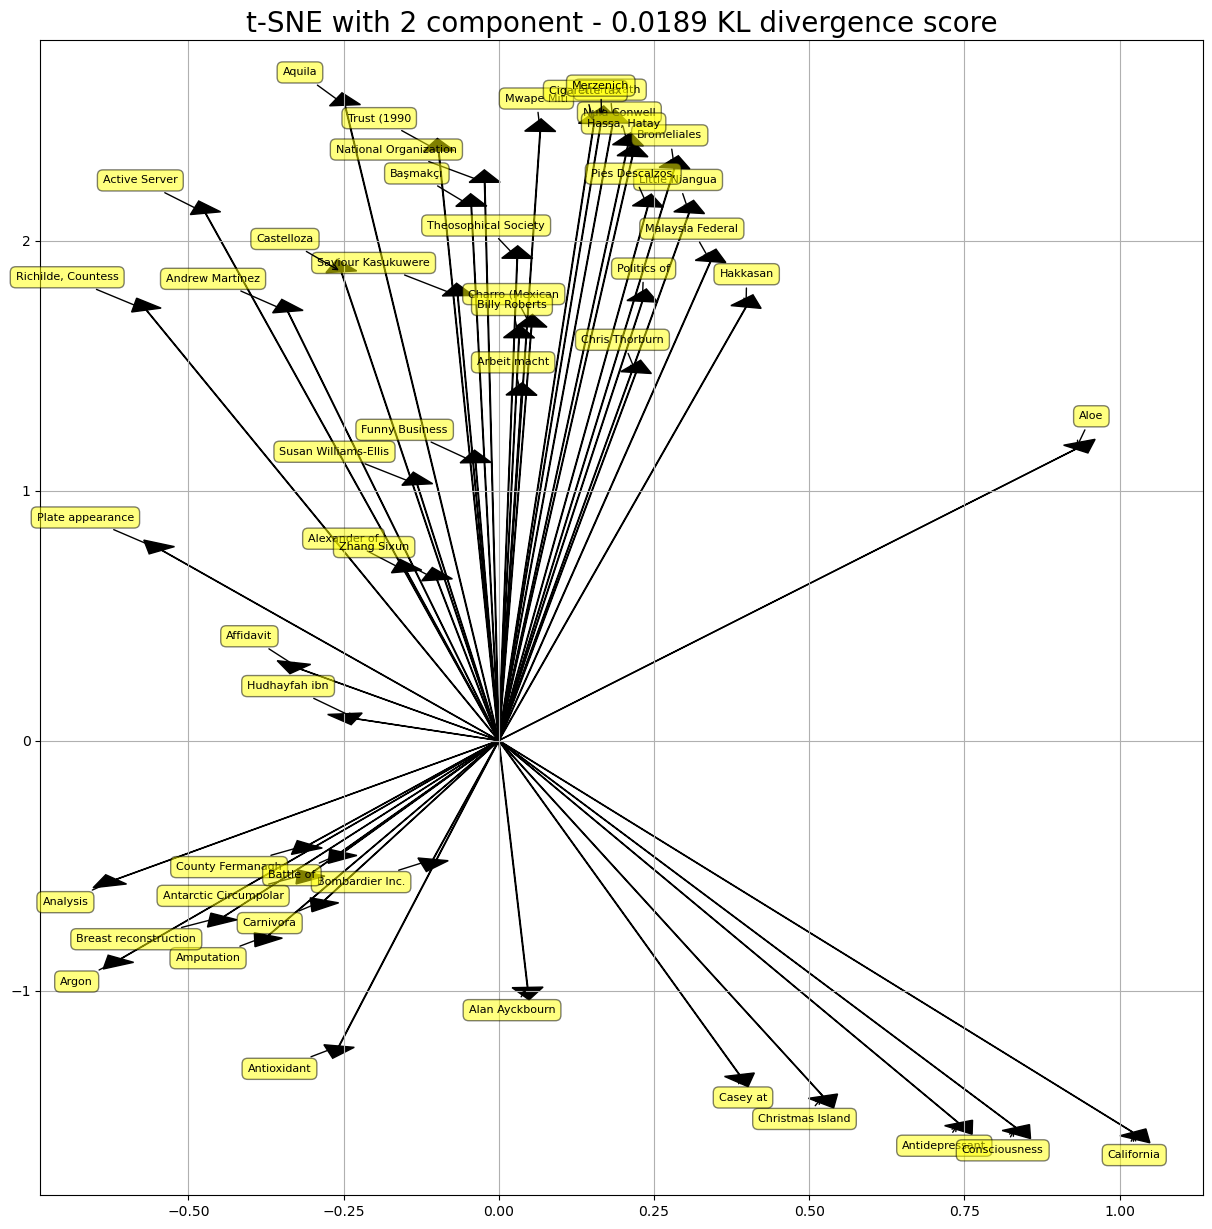

In [12]:
plt.figure(figsize=(15, 15))

for text, x, y in zip(label, Y[:, 0], Y[:, 1]):
    plt.annotate(
        text,
        xy=(x, y), xytext=(math.copysign(20, x), math.copysign(20, y)),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        fontsize=8
    )
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='k', ec='k')
plt.grid()
plt.title(f"t-SNE with 2 component - {tsne.kl_divergence_:.4f} KL divergence score", fontsize=20)
plt.show()
